In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
# Sample movie ratings: user, movie, rating
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3],
    'movie_id': [101, 102, 103, 101, 104, 102, 105],
    'rating':   [5,   3,   4,   4,   2,   5,   3]
}

df = pd.DataFrame(data)
print(df)


   user_id  movie_id  rating
0        1       101       5
1        1       102       3
2        1       103       4
3        2       101       4
4        2       104       2
5        3       102       5
6        3       105       3


In [4]:
# Create a matrix: rows = users, columns = movies
matrix = df.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
print(matrix)


movie_id  101  102  103  104  105
user_id                          
1         5.0  3.0  4.0  0.0  0.0
2         4.0  0.0  0.0  2.0  0.0
3         0.0  5.0  0.0  0.0  3.0


In [5]:
# Find how similar users are to each other
user_similarity = cosine_similarity(matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=matrix.index, columns=matrix.index)
print(user_similarity_df)


user_id         1         2         3
user_id                              
1        1.000000  0.632456  0.363803
2        0.632456  1.000000  0.000000
3        0.363803  0.000000  1.000000


In [6]:
def recommend_movies(user_id, matrix, user_similarity_df):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)  # remove self

    top_user = similar_users.index[0]  # most similar user

    print(f"Most similar user to User {user_id} is User {top_user}")

    user_ratings = matrix.loc[user_id]
    top_user_ratings = matrix.loc[top_user]

    recommendations = top_user_ratings[(user_ratings == 0) & (top_user_ratings > 0)]

    return recommendations.sort_values(ascending=False)

print(recommend_movies(1, matrix, user_similarity_df))


Most similar user to User 1 is User 2
movie_id
104    2.0
Name: 2, dtype: float64


In [7]:
# Dictionary to map movie_id to movie names
movie_titles = {
    101: 'The Lion King',
    102: 'Toy Story',
    103: 'Finding Nemo',
    104: 'Shrek',
    105: 'Frozen'
}


Most similar user to User 1 is User 2


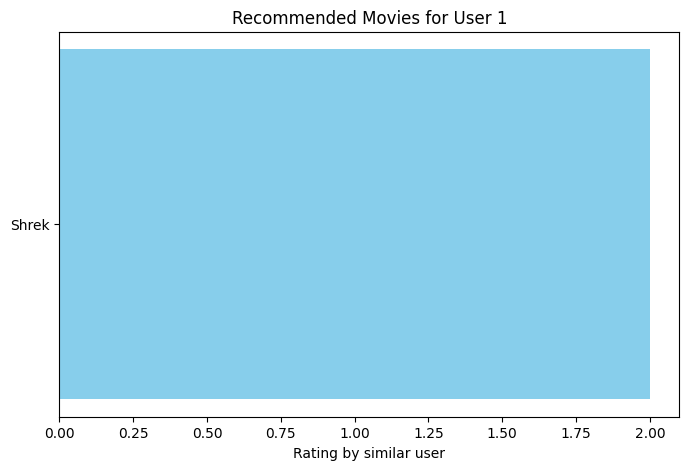

,2
movie_id,
104,2.0


In [8]:
import matplotlib.pyplot as plt

def recommend_movies(user_id, matrix, user_similarity_df, movie_titles):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)

    top_user = similar_users.index[0]
    print(f"Most similar user to User {user_id} is User {top_user}")

    user_ratings = matrix.loc[user_id]
    top_user_ratings = matrix.loc[top_user]

    recommendations = top_user_ratings[(user_ratings == 0) & (top_user_ratings > 0)]
    recommendations = recommendations.sort_values(ascending=False)

    # Convert movie IDs to names
    movie_names = [movie_titles.get(mid, f"Movie {mid}") for mid in recommendations.index]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.barh(movie_names, recommendations.values, color='skyblue')
    plt.xlabel("Rating by similar user")
    plt.title(f"Recommended Movies for User {user_id}")
    plt.gca().invert_yaxis()
    plt.show()

    return recommendations

recommend_movies(1, matrix, user_similarity_df, movie_titles)


Most similar user to User 1 is User 2


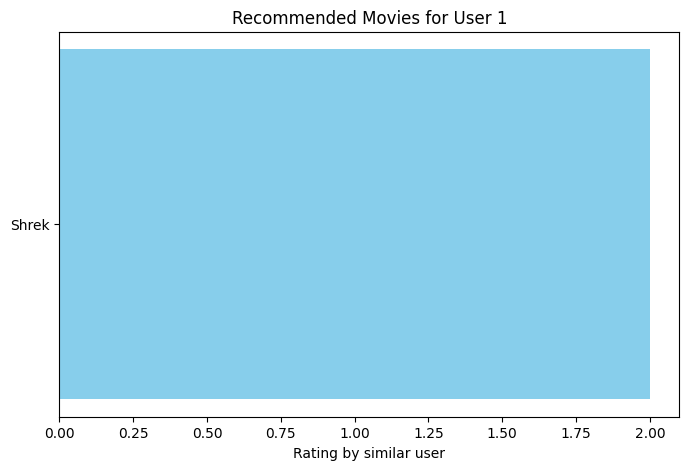

,2
movie_id,
104,2.0


In [9]:
recommend_movies(1, matrix, user_similarity_df, movie_titles)
